In [ ]:
# pandas, matplotlib, seaborn csv 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
#폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

file_path = "/Users/pongpongi/Desktop/Machine Learining/project/연봉_예측/Salary.csv"
df = pd.read_csv(file_path)
salary_data = df

salary_data.head()

/var/folders/7r/4k9j8y4j7_gc5_x3t87s88zr0000gp/T/ipykernel_28821/3486859428.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


Age  Gender  Education Level          Job Title  Years of Experience  \
0  32.0    Male                1  Software Engineer                  5.0   
1  28.0  Female                2       Data Analyst                  3.0   
2  45.0    Male                3            Manager                 15.0   
3  36.0  Female                1    Sales Associate                  7.0   
4  52.0    Male                2           Director                 20.0   

     Salary Country      Race  Senior  
0   90000.0      UK     White       0  
1   65000.0     USA  Hispanic       0  
2  150000.0  Canada     White       1  
3   60000.0     USA  Hispanic       0  
4  200000.0     USA     Asian       0

# 시각화

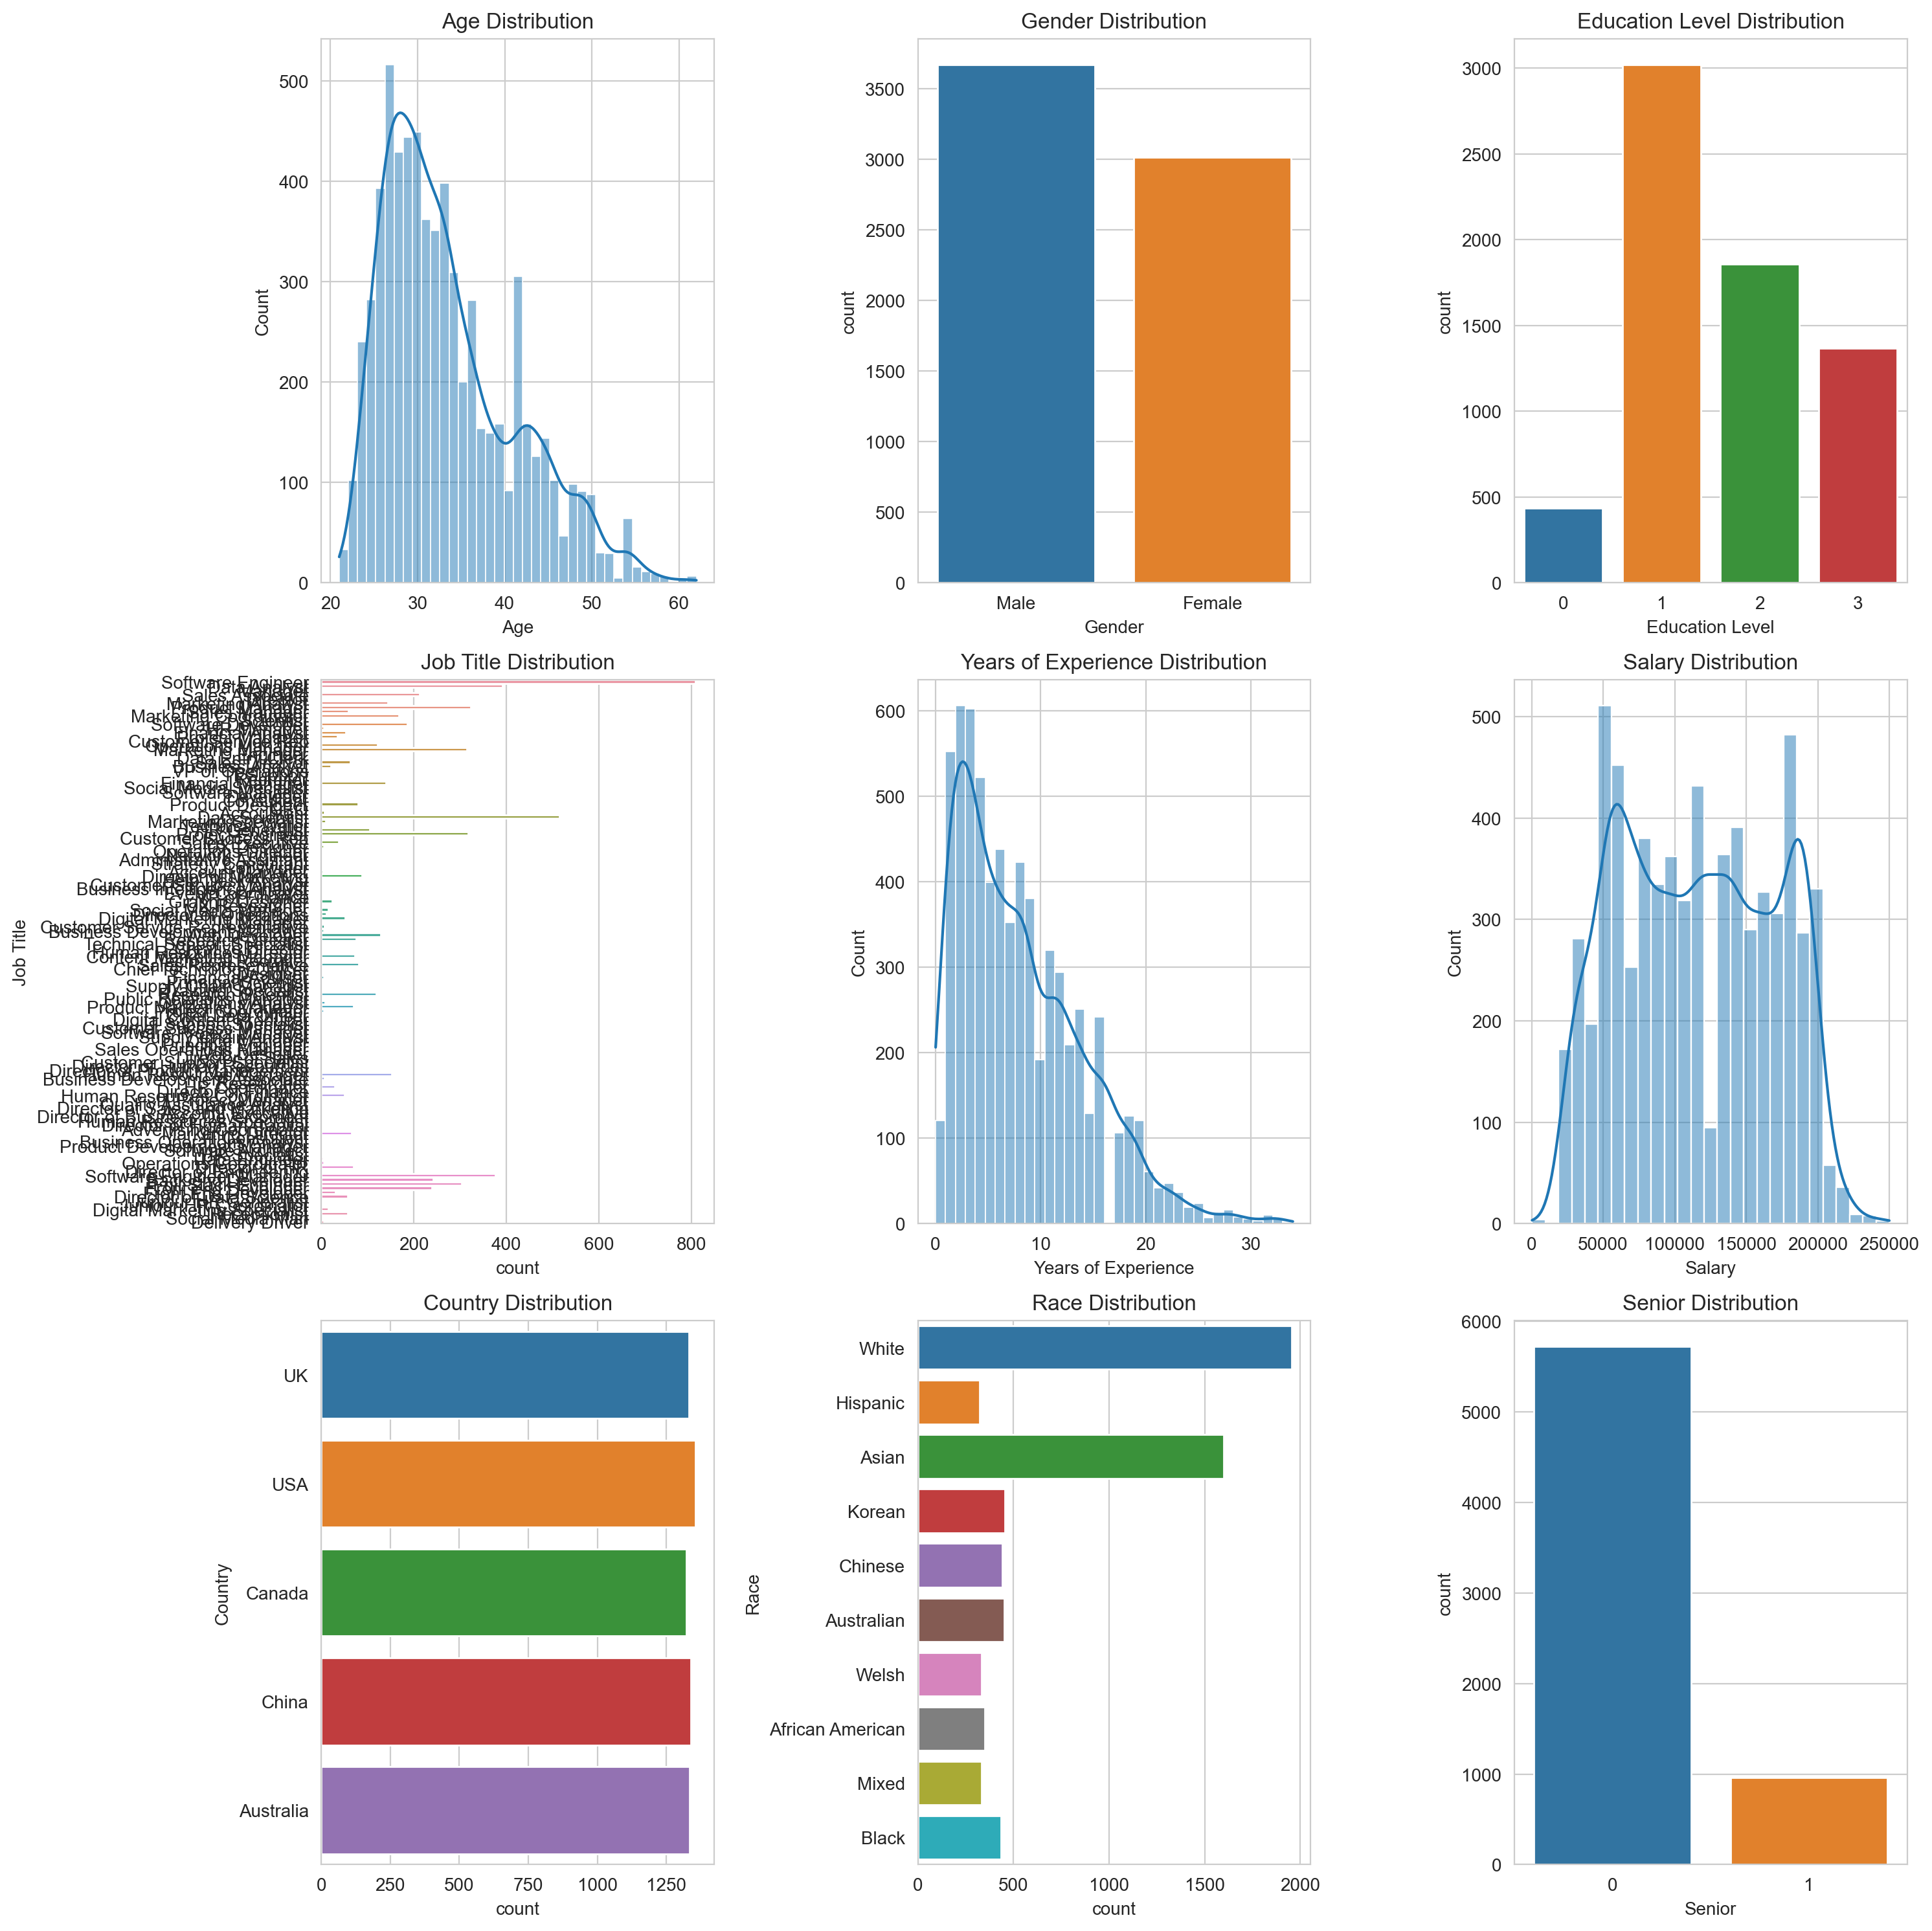

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# 피처 시각화

# Age
sns.histplot(salary_data['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Gender
sns.countplot(x='Gender', data=salary_data, ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')

# Education Level
sns.countplot(x='Education Level', data=salary_data, ax=axes[0, 2])
axes[0, 2].set_title('Education Level Distribution')

# Job Title
sns.countplot(y='Job Title', data=salary_data, ax=axes[1, 0])
axes[1, 0].set_title('Job Title Distribution')

# Years of Experience
sns.histplot(salary_data['Years of Experience'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Years of Experience Distribution')

# Salary
sns.histplot(salary_data['Salary'], kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Salary Distribution')

# Country
sns.countplot(y='Country', data=salary_data, ax=axes[2, 0])
axes[2, 0].set_title('Country Distribution')

# Race
sns.countplot(y='Race', data=salary_data, ax=axes[2, 1])
axes[2, 1].set_title('Race Distribution')

# Senior
sns.countplot(x='Senior', data=salary_data, ax=axes[2, 2])
axes[2, 2].set_title('Senior Distribution')

plt.tight_layout()
plt.show()


## 상관관계

In [ ]:
# 범주형 변수를 수치형으로 변환하기 위해 원-핫 인코딩 적용
# 'Job Title'을 제외한 나머지 범주형 피쳐 선택
categorical_features_without_job = ['Gender', 'Country', 'Race']

# 원-핫 인코딩 적용
onehot_encoded_data = pd.get_dummies(df, columns=categorical_features_without_job)
df = onehot_encoded_data


# 직업명 드랍
df = df.drop('Job Title', axis=1)

In [ ]:
df

Age  Education Level  Years of Experience    Salary  Senior  \
0     32.0                1                  5.0   90000.0       0   
1     28.0                2                  3.0   65000.0       0   
2     45.0                3                 15.0  150000.0       1   
3     36.0                1                  7.0   60000.0       0   
4     52.0                2                 20.0  200000.0       0   
...    ...              ...                  ...       ...     ...   
6679  49.0                3                 20.0  200000.0       0   
6680  32.0                0                  3.0   50000.0       0   
6681  30.0                1                  4.0   55000.0       0   
6682  46.0                2                 14.0  140000.0       0   
6683  26.0                0                  1.0   35000.0       0   

      Gender_Female  Gender_Male  Country_Australia  Country_Canada  \
0             False         True              False           False   
1              True        False              False           False   
2             False         True              False            True   
3              True        False              False           False   
4             False         True              False           False   
...             ...          ...                ...             ...   
6679           True        False              False           False   
6680          False         True               True           False   
6681           True        False              False           False   
6682          False         True              False           False   
6683           True        False              False            True   

      Country_China  ...  Race_African American  Race_Asian  Race_Australian  \
0             False  ...                  False       False            False   
1             False  ...                  False       False            False   
2             False  ...                  False       False            False   
3             False  ...                  False       False            False   
4             False  ...                  False        True            False   
...             ...  ...                    ...         ...              ...   
6679          False  ...                  False       False            False   
6680          False  ...                  False       False             True   
6681           True  ...                  False       False            False   
6682           True  ...                  False       False            False   
6683          False  ...                  False       False            False   

      Race_Black  Race_Chinese  Race_Hispanic  Race_Korean  Race_Mixed  \
0          False         False          False        False       False   
1          False         False           True        False       False   
2          False         False          False        False       False   
3          False         False           True        False       False   
4          False         False          False        False       False   
...          ...           ...            ...          ...         ...   
6679       False         False          False        False        True   
6680       False         False          False        False       False   
6681       False          True          False        False       False   
6682       False         False          False         True       False   
6683        True         False          False        False       False   

      Race_Welsh  Race_White  
0          False        True  
1          False       False  
2          False        True  
3          False       False  
4          False       False  
...          ...         ...  
6679       False       False  
6680       False       False  
6681       False       False  
6682       False       False  
6683       False       False  

[6684 rows x 22 columns]

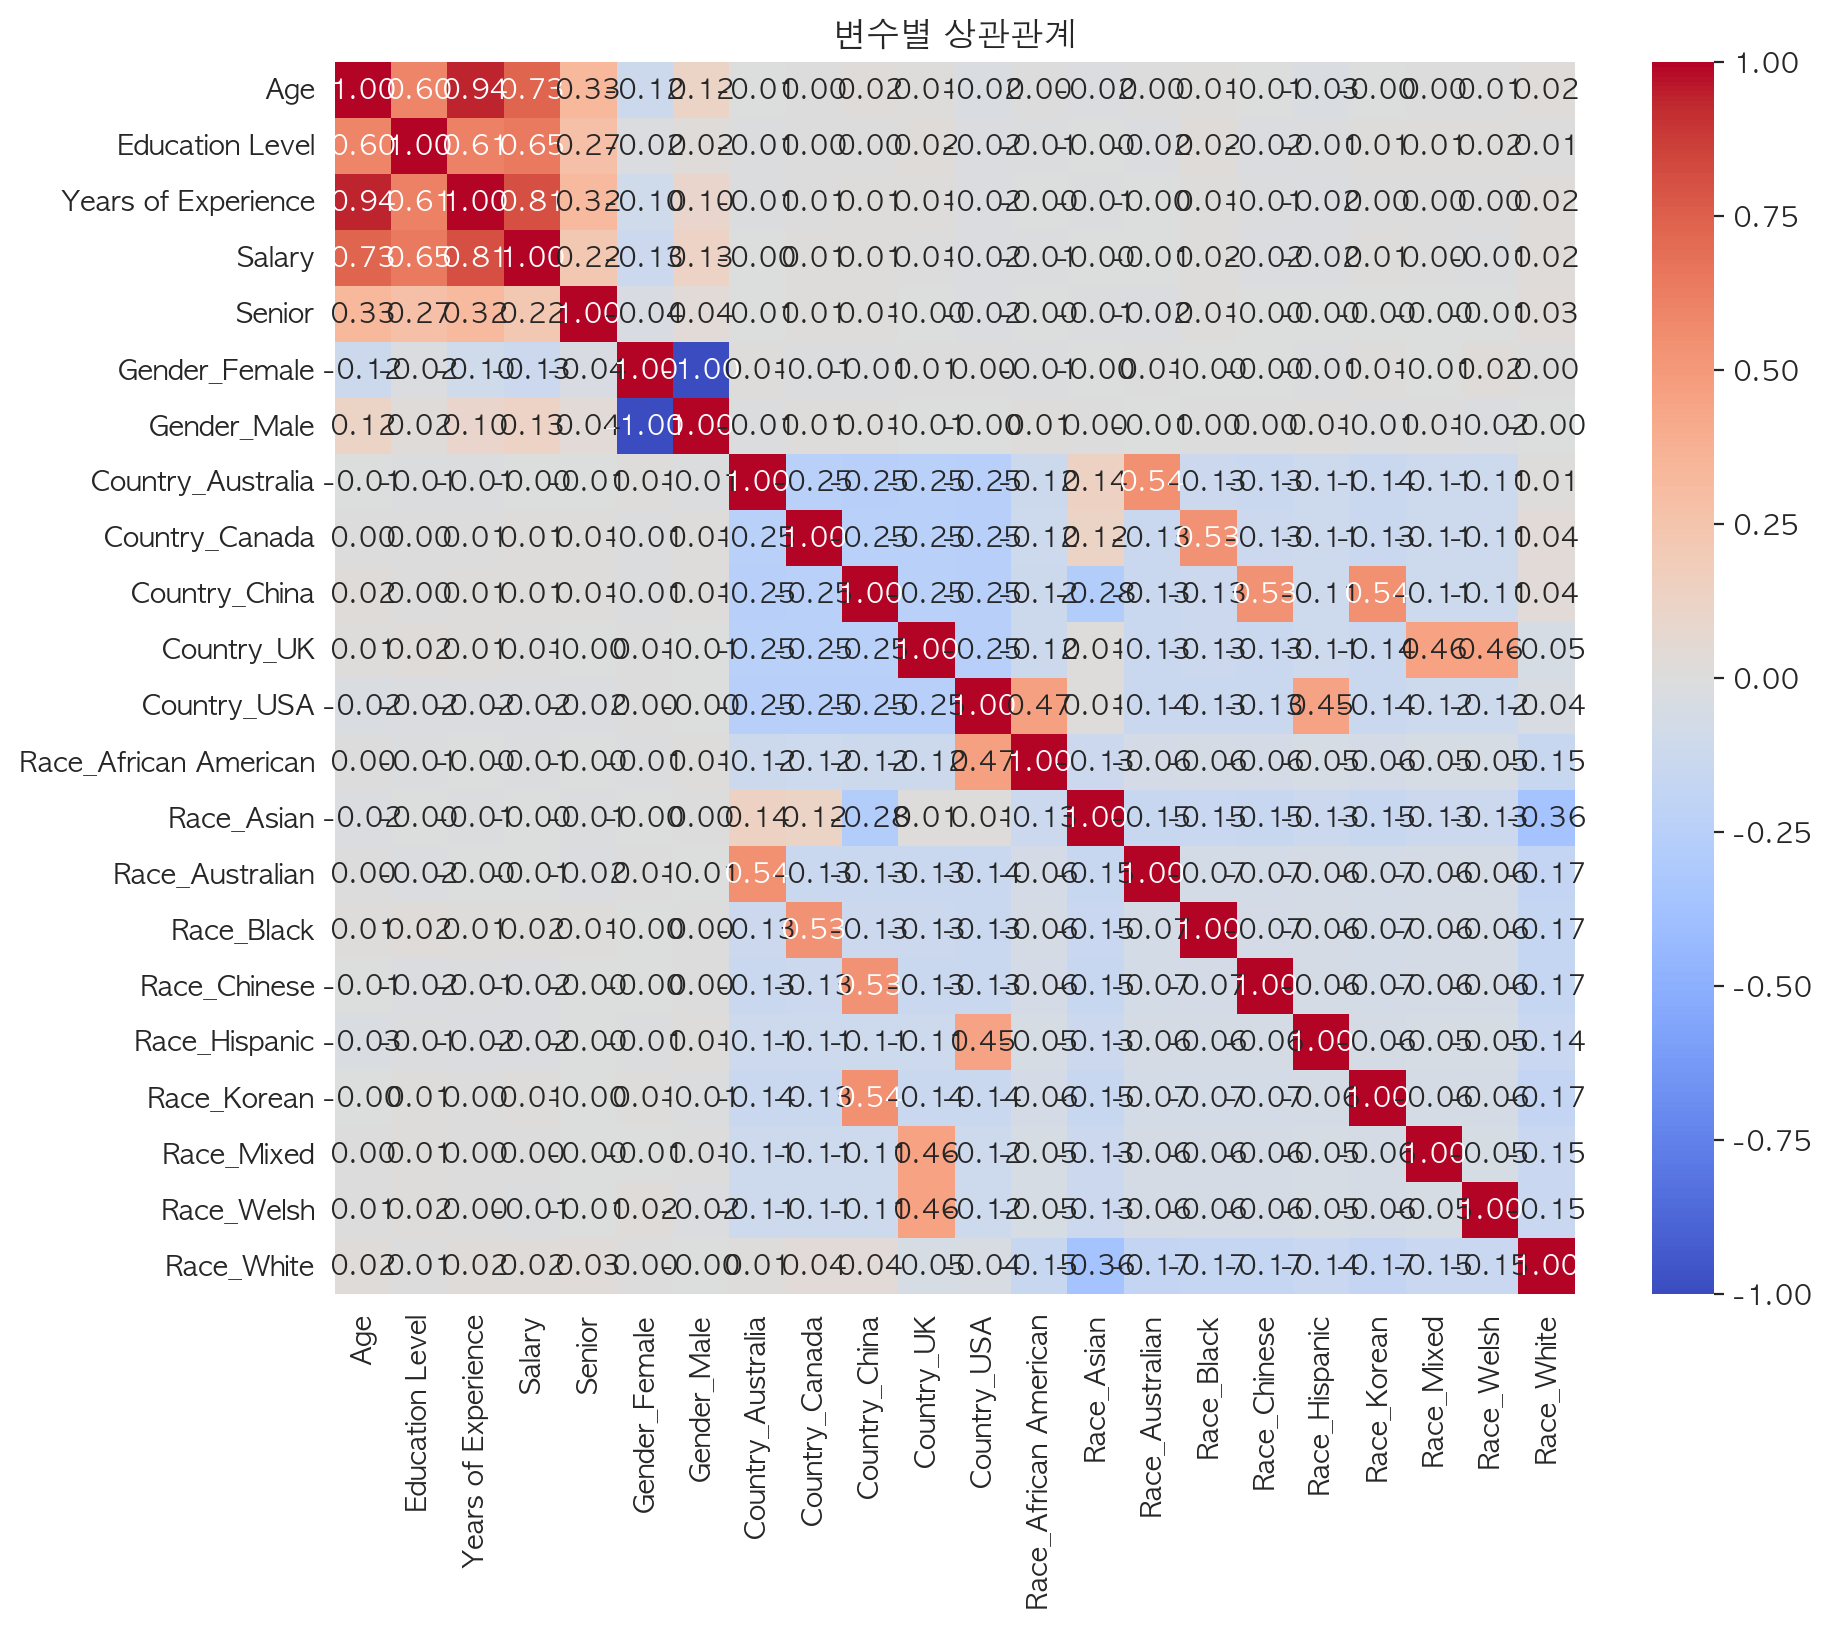

In [ ]:
# 변수들 간의 상관관계 계산
plt.rc('font', family='AppleGothic')
correlation_matrix = df.corr()

# 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('변수별 상관관계')
plt.show()

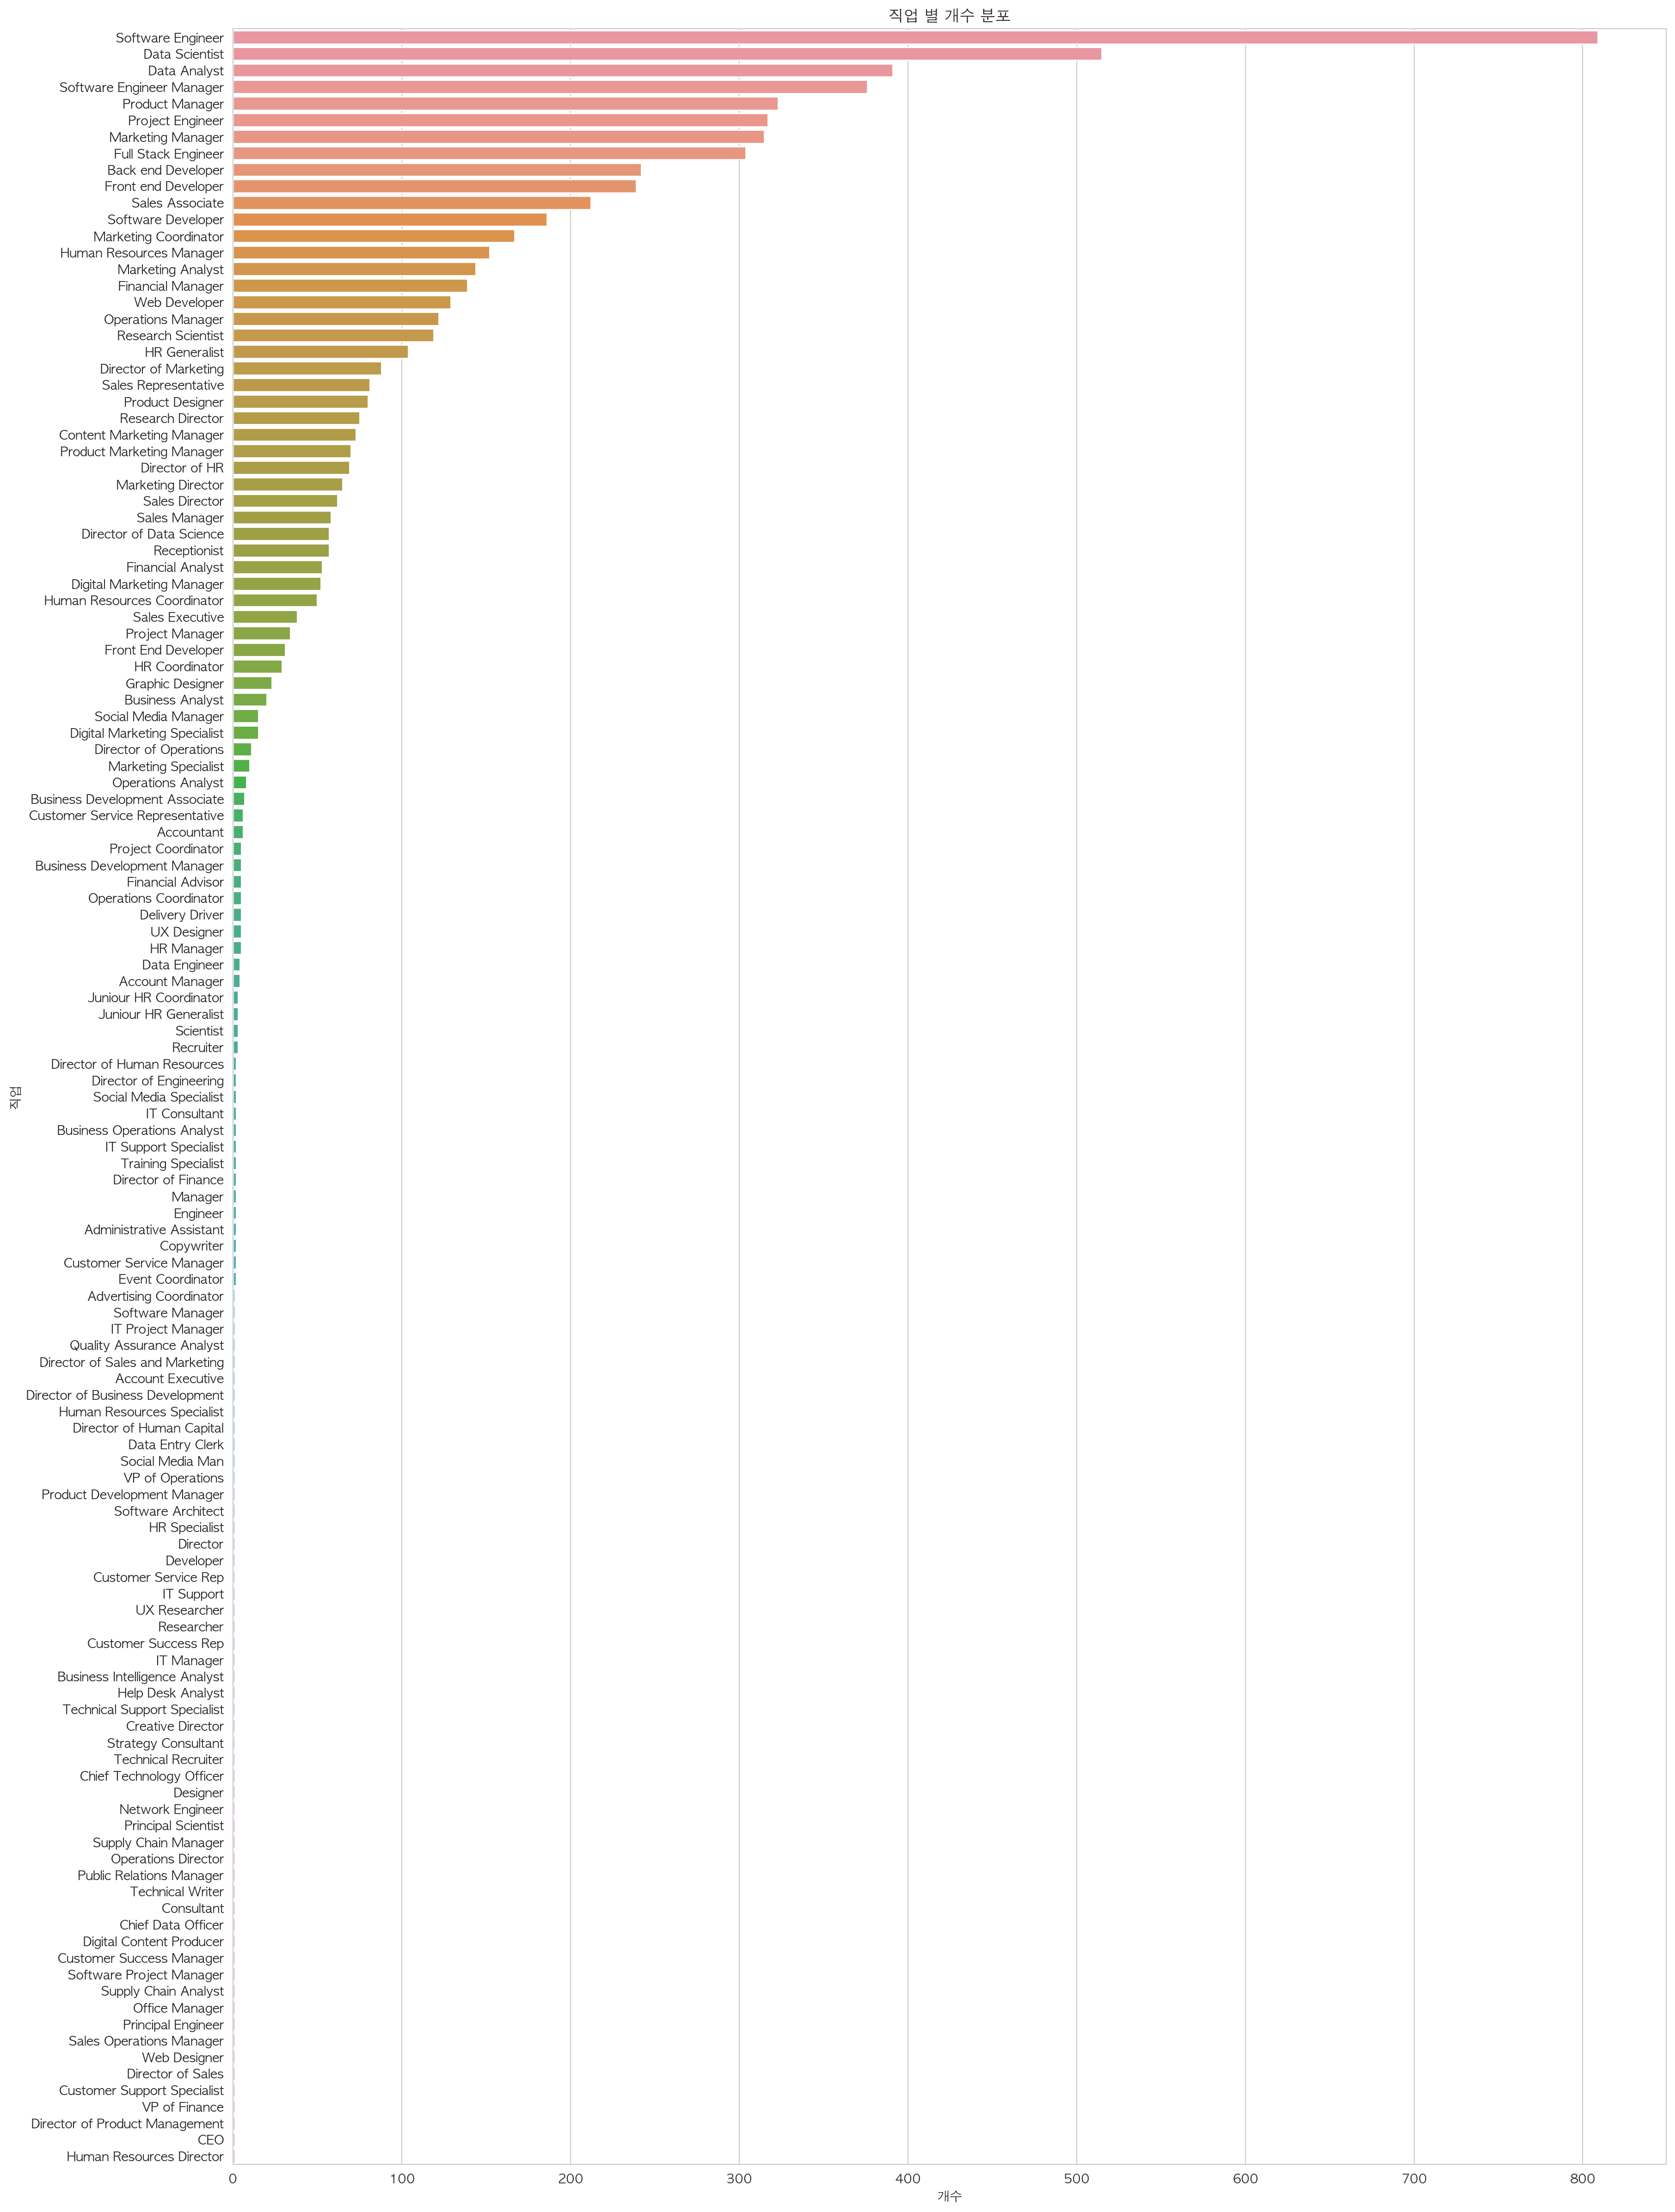

In [ ]:
job_counts = salary_data['Job Title'].value_counts()

plt.rc('font', family='AppleGothic')

plt.figure(figsize=(20, 30))
sns.barplot(y=job_counts.index, x=job_counts.values)
plt.title('직업 별 개수 분포')
plt.xlabel('개수')
plt.ylabel('직업')
plt.show()

# 모델 설계

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 정규화를 위한 StandardScaler 인스턴스 생성
scaler = StandardScaler()

# 'Salary' 제외한 숫자형 피쳐 정규화
numerical_features = ['Age', 'Education Level', 'Years of Experience', 'Senior']
salary_data[numerical_features] = scaler.fit_transform(salary_data[numerical_features])

# 원-핫 인코딩 적용
categorical_features = ['Gender', 'Job Title', 'Country', 'Race']
encoded_data = pd.get_dummies(salary_data, columns=categorical_features)

# 목표 변수(연봉)와 예측 변수 분리
X = encoded_data.drop('Salary', axis=1)
y = encoded_data['Salary']

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 구축 및 훈련
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 테스트 세트에 대한 예측 수행
y_pred_linear = linear_model.predict(X_test)

# 선형 회귀 모델의 성능 메트릭 계산
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# 랜덤 포레스트 회귀 모델 구축 및 훈련
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 랜덤 포레스트 모델의 성능 메트릭 계산
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_linear, r2_linear, mse_rf, r2_rf

(1.0973568487442395e+31,
 -3.94887310200356e+21,
 77553165.20879604,
 0.9720922498074617)

In [ ]:
# 'Country' 관련 원-핫 인코딩된 열들 찾기
country_columns = [col for col in combined_data.columns if col.startswith('Country_')]

# 'Job Title' 관련 원-핫 인코딩된 열들 찾기
job_title_columns = [col for col in combined_data.columns if col.startswith('Job Title_')]

# 각 국적별 직종별 종사자 수 계산
country_job_title_counts = {}
for country_col in country_columns:
    country_data = combined_data[combined_data[country_col] == 1]
    job_counts = country_data[job_title_columns].sum()
    country_job_title_counts[country_col] = job_counts

# 결과 출력
for country, counts in country_job_title_counts.items():
    print(f"{country}:\n{counts.sort_values(ascending=False)}\n")

# 연봉 예측 수행

In [ ]:
import random

# 데이터 로드 및 기초 전처리
numerical_features = ['Age', 'Education Level', 'Years of Experience', 'Senior']
categorical_features = ['Gender', 'Job Title', 'Country', 'Race']
encoded_data = pd.get_dummies(salary_data, columns=categorical_features)

# 연봉에 대한 별도의 스케일러 생성 및 적용
salary_scaler = StandardScaler()
salary_scaled = salary_scaler.fit_transform(salary_data[['Salary']])

# 목표 변수(연봉)와 예측 변수 분리
X_full = encoded_data.drop('Salary', axis=1)
y_full = salary_scaled

# 데이터셋 분할
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 구축 및 훈련
rf_model_full = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_full.fit(X_train_full, y_train_full.ravel())

# 임의의 사용자 정보 생성 및 예측
# random_user_info = {
#     "Age": random.randint(20, 60),
#     "Gender_Male": random.randint(0, 1),
#     "Gender_Female": 1 - random.randint(0, 1),
#     "Education Level": random.randint(1, 3),
#     "Years of Experience": random.uniform(0, 20),
#     "Country_America": random.randint(0, 1),
#     "Race_Korean": random.randint(0, 1),
#     "Senior": random.randint(0, 1)
# }
random_user_info = {
    "Age": 26,
    "Gender_Male": 1,
    "Gender_Female": 0,
    "Education Level": 1,
    "Years of Experience": 1,
    "Country_America": 1,
    "Race_Korean": 1,
    "Senior": 0,
}


job_titles = [col for col in X_train_full.columns if col.startswith('Job Title_')]
# random_job_title = random.choice(job_titles)
random_job_title = 'Software Engineer'
random_user_info[random_job_title] = 1
random_user_df = pd.DataFrame([random_user_info])
for col in X_train_full.columns:
    if col not in random_user_df:
        random_user_df[col] = 0
random_user_df = random_user_df[X_train_full.columns]
predicted_random_salary_full = rf_model_full.predict(random_user_df)

# 예측된 연봉을 원래 스케일로 변환
predicted_salary_random_dollars_full = salary_scaler.inverse_transform(predicted_random_salary_full.reshape(-1, 1))[0][0]
predicted_salary_random_dollars_full, random_user_info


/var/folders/7r/4k9j8y4j7_gc5_x3t87s88zr0000gp/T/ipykernel_28821/3720135494.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  random_user_df[col] = 0
/var/folders/7r/4k9j8y4j7_gc5_x3t87s88zr0000gp/T/ipykernel_28821/3720135494.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  random_user_df[col] = 0
/var/folders/7r/4k9j8y4j7_gc5_x3t87s88zr0000gp/T/ipykernel_28821/3720135494.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.

(161769.99999999994,
 {'Age': 26,
  'Gender_Male': 1,
  'Gender_Female': 0,
  'Education Level': 1,
  'Years of Experience': 1,
  'Country_America': 1,
  'Race_Korean': 1,
  'Senior': 0,
  'Software Engineer': 1})

시도해볼만한 것들

1. 인종만 바꿔서 차이 봐보기
2. 실제 연봉과 예상 연봉의 차이 보기
3. 나이를 바꿔서 봐보기